In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2591 - loss: 1.4024 - val_accuracy: 0.2344 - val_loss: 1.3953
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3683 - loss: 1.3586 - val_accuracy: 0.2344 - val_loss: 1.3889
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3132 - loss: 1.3636 - val_accuracy: 0.2656 - val_loss: 1.3875
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3677 - loss: 1.3353 - val_accuracy: 0.2656 - val_loss: 1.3895
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3751 - loss: 1.3227 - val_accuracy: 0.2500 - val_loss: 1.3940
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4112 - loss: 1.3157 - val_accuracy: 0.2188 - val_loss: 1.4063
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4274 - loss: 1.3123 - val_accuracy: 0.2344 - val_loss: 1.4108
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4318 - loss: 1.2964 - val_accuracy: 0.2344 - val_loss: 1.4115
Ep

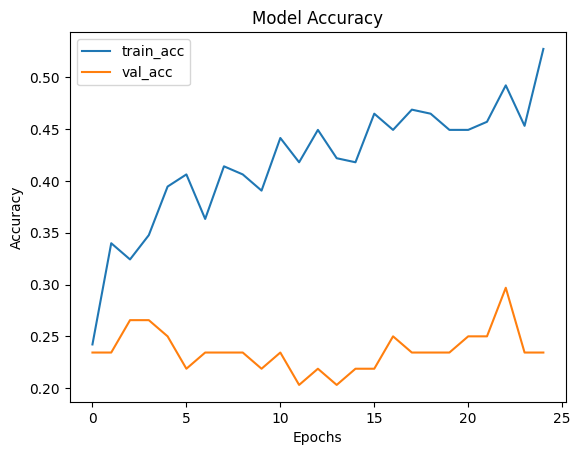

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('/content/drive/MyDrive/Image_Features.csv')

# Step 2: Preprocessing
X = df.drop('Category', axis=1)
y = LabelEncoder().fit_transform(df['Category'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Build CNN-like Dense Model (simulated image data)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train model
history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_split=0.2, verbose=1)

# Step 5: Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

# Step 6: Plot training curves
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
